In [20]:
# Dependencies
import gzip
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from datetime import date
import datetime
import calendar
import holidays
from pprint import pprint
import calmap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [21]:
# Import NYC Data
NY_df = pd.read_csv('NYcalendar.csv.gz', nrows=100000, compression='gzip', error_bad_lines=False)
# Set Display Options
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)
pd.set_option('display.width', 100000)
NY_df['City'] = "NY"

In [22]:
# Import Data
SF_df = pd.read_csv('SFcalendar.csv.gz', nrows=100000, compression='gzip', error_bad_lines=False)
SF_df = SF_df.drop(['adjusted_price', 'minimum_nights', 'maximum_nights'], axis=1)
# Set Display Options
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)
pd.set_option('display.width', 100000)
SF_df['City'] = "SF"

In [23]:
# Current Value Formats
NY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
listing_id        100000 non-null int64
date              100000 non-null object
available         100000 non-null object
price             100000 non-null object
adjusted_price    100000 non-null object
minimum_nights    100000 non-null int64
maximum_nights    100000 non-null int64
City              100000 non-null object
dtypes: int64(3), object(5)
memory usage: 6.1+ MB


In [24]:
# Current Value Formats
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
listing_id    100000 non-null int64
date          100000 non-null object
available     100000 non-null object
price         100000 non-null object
City          100000 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [25]:
# Reformat NY Values
NY_df=NY_df.dropna()
NY_df['price'] = NY_df['price'].map(lambda x: x.lstrip('$'))
NY_df['price'] = NY_df['price'].str.replace(',', '')
NY_df['year'] = NY_df['date'].str[0:4]
NY_df['month'] = NY_df['date'].str[5:7]
NY_df['day'] = NY_df['date'].str[8:10]
NY_df['date'] = pd.to_datetime(NY_df['date'])
NY_df['price'] = pd.to_numeric(NY_df['price'])
NY_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
listing_id        100000 non-null int64
date              100000 non-null datetime64[ns]
available         100000 non-null object
price             100000 non-null float64
adjusted_price    100000 non-null object
minimum_nights    100000 non-null int64
maximum_nights    100000 non-null int64
City              100000 non-null object
year              100000 non-null object
month             100000 non-null object
day               100000 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 9.2+ MB


In [26]:
# Reformat SF Values
SF_df=SF_df.dropna()
SF_df['price'] = SF_df['price'].map(lambda x: x.lstrip('$'))
SF_df['price'] = SF_df['price'].str.replace(',', '')
SF_df['year'] = SF_df['date'].str[0:4]
SF_df['month'] = SF_df['date'].str[5:7]
SF_df['day'] = SF_df['date'].str[8:10]
SF_df['date'] = pd.to_datetime(SF_df['date'])
SF_df['price'] = pd.to_numeric(SF_df['price'])
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
listing_id    100000 non-null int64
date          100000 non-null datetime64[ns]
available     100000 non-null object
price         100000 non-null float64
City          100000 non-null object
year          100000 non-null object
month         100000 non-null object
day           100000 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.9+ MB


In [27]:
joined_df = NY_df.append(SF_df)
joined_df.info()

C:\Users\stabe\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 11 columns):
City              200000 non-null object
adjusted_price    100000 non-null object
available         200000 non-null object
date              200000 non-null datetime64[ns]
day               200000 non-null object
listing_id        200000 non-null int64
maximum_nights    100000 non-null float64
minimum_nights    100000 non-null float64
month             200000 non-null object
price             200000 non-null float64
year              200000 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 18.3+ MB


In [28]:
# NY_ID Day of Week and Holidays
us_holidays = holidays.US()
NY_df['dayofweek']='default'
NY_df['holiday']='False'
NY_df['holiday_name']='working'
for index,row in NY_df.iterrows():
    sdate = datetime.date(int(row['year']),int(row['month']),int(row['day']))
    vall=date(int(row['year']),int(row['month']),int(row['day'])) in us_holidays
    NY_df.set_value(index,'dayofweek', calendar.day_name[sdate.weekday()])
    NY_df.set_value(index,'holiday',vall)
    NY_df.set_value(index,'holiday_name',us_holidays.get(sdate))

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [29]:
# SF_ID Day of Week and Holidays
us_holidays = holidays.US()
SF_df['dayofweek']='default'
SF_df['holiday']='False'
SF_df['holiday_name']='working'
for index,row in SF_df.iterrows():
    sdate = datetime.date(int(row['year']),int(row['month']),int(row['day']))
    vall=date(int(row['year']),int(row['month']),int(row['day'])) in us_holidays
    SF_df.set_value(index,'dayofweek', calendar.day_name[sdate.weekday()])
    SF_df.set_value(index,'holiday',vall)
    SF_df.set_value(index,'holiday_name',us_holidays.get(sdate))

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [30]:
#### Calc Avg Prices for NY_DoW
NY_DoW_df=NY_df.groupby(['dayofweek', 'City']).price.mean()
NY_DoW_df=NY_DoW_df.reset_index()
NY_DoW_df['day#']=0

for index,row in NY_DoW_df.iterrows():
    if row['dayofweek']=='Monday':
        NY_DoW_df.set_value(index,'day#',1)
    if row['dayofweek']=='Tuesday':
        NY_DoW_df.set_value(index,'day#',2)
    if row['dayofweek']=='Wednesday':
        NY_DoW_df.set_value(index,'day#',3)
    if row['dayofweek']=='Thursday':
        NY_DoW_df.set_value(index,'day#',4)
    if row['dayofweek']=='Friday':
        NY_DoW_df.set_value(index,'day#',5)
    if row['dayofweek']=='Saturday':
        NY_DoW_df.set_value(index,'day#',6)
    if row['dayofweek']=='Sunday':
        NY_DoW_df.set_value(index,'day#',7)
NY_DoW_df=NY_DoW_df.sort_values('day#',ascending=[1])
NY_DoW_df=NY_DoW_df.rename(columns={'price':'Average_Price'})
NY_DoW_df.head()

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,dayofweek,City,Average_Price,day#
1,Monday,NY,149.153096,1
5,Tuesday,NY,149.213393,2
6,Wednesday,NY,149.073342,3
4,Thursday,NY,149.098687,4
0,Friday,NY,151.596827,5


In [31]:
#### Calc Avg Prices for SF_DoW
SF_DoW_df=SF_df.groupby(['dayofweek', 'City']).price.mean()
SF_DoW_df=SF_DoW_df.reset_index()
SF_DoW_df['day#']=0

for index,row in SF_DoW_df.iterrows():
    if row['dayofweek']=='Monday':
        SF_DoW_df.set_value(index,'day#',1)
    if row['dayofweek']=='Tuesday':
        SF_DoW_df.set_value(index,'day#',2)
    if row['dayofweek']=='Wednesday':
        SF_DoW_df.set_value(index,'day#',3)
    if row['dayofweek']=='Thursday':
        SF_DoW_df.set_value(index,'day#',4)
    if row['dayofweek']=='Friday':
        SF_DoW_df.set_value(index,'day#',5)
    if row['dayofweek']=='Saturday':
        SF_DoW_df.set_value(index,'day#',6)
    if row['dayofweek']=='Sunday':
        SF_DoW_df.set_value(index,'day#',7)
SF_DoW_df=SF_DoW_df.sort_values('day#',ascending=[1])
SF_DoW_df=SF_DoW_df.rename(columns={'price':'Average_Price'})
SF_DoW_df.head()

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,dayofweek,City,Average_Price,day#
1,Monday,SF,171.498386,1
5,Tuesday,SF,171.587814,2
6,Wednesday,SF,171.660423,3
4,Thursday,SF,171.631150,4
0,Friday,SF,174.627430,5


C:\Users\stabe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\stabe\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3600x1440 with 0 Axes>

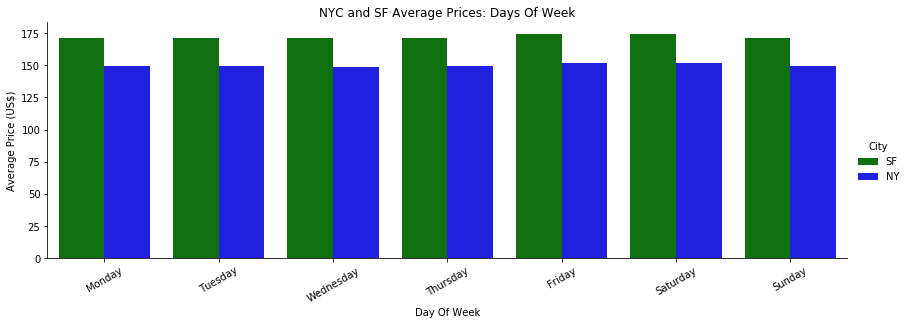

In [32]:
joined_df = SF_DoW_df.append(NY_DoW_df)
plt.figure(figsize=(50,20))
ax=sns.factorplot(x='dayofweek', y='Average_Price', hue='City', data=joined_df, kind='bar', palette=["g","b"], size=4, aspect=3)
ax.set(xlabel='Day Of Week', ylabel='Average Price (US$)')
ax.set_xticklabels(rotation=30)
plt.title("NYC and SF Average Prices: Days Of Week") 
plt.savefig("Average Day Of Week Prices.png", bbox_inches='tight')



In [33]:
# Calc Avg Prices for Holidays
NY_df=NY_df.groupby(['holiday_name', 'City']).price.mean()
NY_df=NY_df.reset_index()
NY_df['hol#']=0

for index,row in NY_df.iterrows():
    if row['holiday_name']=="New Year's Day":
        NY_df.set_value(index,'hol#',0)
    if row['holiday_name']=='Martin Luther King, Jr. Day':
        NY_df.set_value(index,'hol#',1)
    if row['holiday_name']=="Presidents Day":
        NY_df.set_value(index,'hol#',2)
    if row['holiday_name']=='Memorial Day':
        NY_df.set_value(index,'hol#',3)
    if row['holiday_name']=='Independence Day':
        NY_df.set_value(index,'hol#',4)
    if row['holiday_name']=='Labor Day':
        NY_df.set_value(index,'hol#',5)
    if row['holiday_name']=='Columbus Day':
        NY_df.set_value(index,'hol#',6)
    if row['holiday_name']=='Veterans Day':
        NY_df.set_value(index,'hol#',7)
#    if row['holiday_name']=="Veterans Day (Observed)":
#        NY_df.set_value(index,'hol#',8)
    if row['holiday_name']=='Thanksgiving':
        NY_df.set_value(index,'hol#',8)
    if row['holiday_name']=='Christmas Day':
        NY_df.set_value(index,'hol#',9)
NY_df=NY_df.sort_values('hol#',ascending=[1])
NY_df=NY_df.rename(columns={'price':'Average_Price'})
NY_df

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  

,holiday_name,City,Average_Price,hol#
6,New Year's Day,NY,152.329670,0
9,Washington's Birthday,NY,141.127737,0
4,"Martin Luther King, Jr. Day",NY,139.076642,1
5,Memorial Day,NY,150.248175,3
2,Independence Day,NY,150.335766,4
3,Labor Day,NY,152.726277,5
1,Columbus Day,NY,152.149635,6
8,Veterans Day,NY,151.686131,7
7,Thanksgiving,NY,151.959854,8
0,Christmas Day,NY,151.915751,9


In [34]:
# Calc Avg Prices for Holidays
SF_df=SF_df.groupby(['holiday_name', 'City']).price.mean()
SF_df=SF_df.reset_index()
SF_df['hol#']=0

for index,row in SF_df.iterrows():
    if row['holiday_name']=="New Years":
        SF_df.set_value(index,'hol#',0)
    if row['holiday_name']=='Martin Luther King, Jr. Day':
        SF_df.set_value(index,'hol#',1)
    if row['holiday_name']=="Presidents Day":
        SF_df.set_value(index,'hol#',2)
    if row['holiday_name']=='Memorial Day':
        SF_df.set_value(index,'hol#',3)
    if row['holiday_name']=='Independence Day':
        SF_df.set_value(index,'hol#',4)
    if row['holiday_name']=='Labor Day':
        SF_df.set_value(index,'hol#',5)
    if row['holiday_name']=='Columbus Day':
        SF_df.set_value(index,'hol#',6)
    if row['holiday_name']=='Veterans Day':
        SF_df.set_value(index,'hol#',7)
    if row['holiday_name']=="Veterans Day (Observed)":
        SF_df.set_value(index,'hol#',8)
    if row['holiday_name']=='Thanksgiving':
        SF_df.set_value(index,'hol#',9)
    if row['holiday_name']=='Christmas Day':
        SF_df.set_value(index,'hol#',10)
SF_df=SF_df.sort_values('hol#',ascending=[1])
SF_df=SF_df.rename(columns={'price':'Average_Price'})
SF_df

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  

,holiday_name,City,Average_Price,hol#
6,New Year's Day,SF,175.428571,0
9,Washington's Birthday,SF,166.470803,0
4,"Martin Luther King, Jr. Day",SF,164.609489,1
5,Memorial Day,SF,171.620438,3
2,Independence Day,SF,174.642336,4
3,Labor Day,SF,173.744526,5
1,Columbus Day,SF,174.291971,6
8,Veterans Day,SF,173.766423,7
7,Thanksgiving,SF,174.572993,9
0,Christmas Day,SF,174.160584,10


C:\Users\stabe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\stabe\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3600x1440 with 0 Axes>

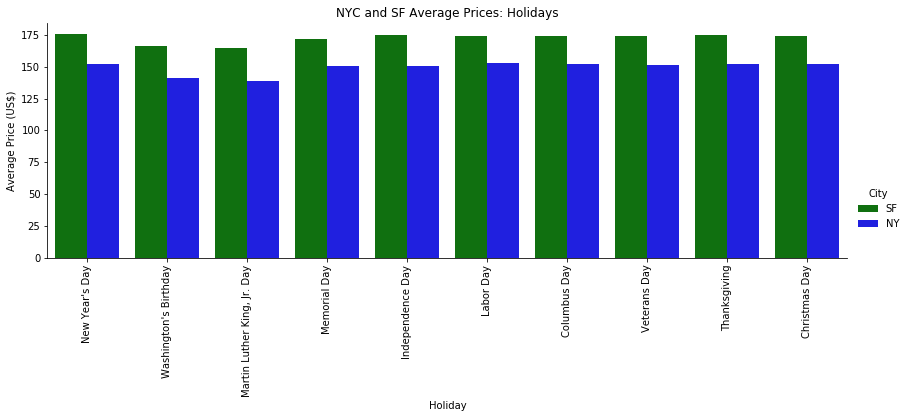

In [35]:
joined_df = SF_df.append(NY_df)
joined_df = joined_df[joined_df.holiday_name != 'Veterans Day (Observed)']
plt.figure(figsize=(50,20))
ax=sns.factorplot(x='holiday_name', y='Average_Price', hue='City', data=joined_df, kind='bar', palette=["g","b"], size=4, aspect=3)
ax.set(xlabel='Holiday', ylabel='Average Price (US$)')
ax.set_xticklabels(rotation=90)
plt.title("NYC and SF Average Prices: Holidays") 
plt.savefig("Average Holiday Prices.png", bbox_inches='tight')